# Kaggle: Titanic
https://www.kaggle.com/c/titanic <br/>
Data: 06/02/2019 (updated)<br/>
Autor: Diego Abreu | https://github.com/DiegoAbreu/

Desafio: Prever se um passageiro sobreviveu ou não, baseando-se em seus dados.

***

##O quê os dados significam?


* **PassengerId: ** Número de identificação do passageiro;

* **Survived: **Indica se o passageiro sobreviveu. 0 = Não sobreviveu e 1 = Sobreviveu;

* **Pclass:** Classe. 1 = Primeira classe, 2 = Segunda classe e 3 = Terceira classe;

* **Name:** Nome do passageiro;

* **Sex:** Gênero;

* **Age:** Idade em anos;

* **SibSp:** Número de irmãos e cônjuges a bordo ;

* **Parch:** Número de pais e filhos a bordo;

* **Ticket:** Número do bilhete da passagem;

* **Fare:** Valor da passagem;

* **Cabin:** Número da cabine;

* **Embarked:** Porto em que embarcou. C = Cherbourg, Q = Queenstown e S = Southampton.

<br/>

O objetivo desse desafio é criar um modelo de predição que seja capaz de atribuir um valor para a variável "Survived" com base nas demais informações.


***

## Importando o Pandas e os datasets de treino e teste:

In [0]:
import pandas as pd
Treino = pd.read_csv("https://diegoabreu.com/Uploads/Datasets/Kg-Titanic/train.csv")
Teste = pd.read_csv("https://diegoabreu.com/Uploads/Datasets/Kg-Titanic/test.csv")

Verificando os dados:

Tamanhos:

In [2]:
Treino.shape

(891, 12)

In [3]:
Teste.shape

(418, 11)

Datasets:

In [4]:
Treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


***

##Tratamento dos dados

###(T1) Removendo valores desnecessários:


Aqui, retiramos valores que não devem influenciar na predição:


In [0]:
Treino_t1 = Treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)
Teste_t1 = Teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)

Verificando:

In [7]:
Treino_t1.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


In [8]:
Teste_t1.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q


###(T2)Transformando os valores categóricos em valores numéricos.

Mudando as variavéis "Pclass" e "Embarked" para o tipo categoria.



In [0]:
Treino_t2 = Treino_t1
Teste_t2 = Teste_t1
Treino_t2['Pclass'] = Treino_t2['Pclass'].astype('category')
Teste_t2['Pclass'] = Teste_t2['Pclass'].astype('category')
Treino_t2['Embarked'] = Treino_t2['Embarked'].astype('category')
Teste_t2['Embarked'] = Teste_t2['Embarked'].astype('category')

Usando Get Dummies para transformar as categorias em valores binários.

In [0]:
Treino_t2 = pd.get_dummies(Treino_t2)
Teste_t2 = pd.get_dummies(Teste_t1)

Conferindo os datasets:

In [11]:
Treino_t2.head(3)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1


In [12]:
Teste_t2.head(3)

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0


### (T3) Substituindo valores faltantes (NA)

Verificando onde existem valores Na no dataset de Treino:

In [13]:
Treino_t2.isnull().sum().sort_values(ascending=False)

Age            177
Embarked_S       0
Embarked_Q       0
Embarked_C       0
Sex_male         0
Sex_female       0
Pclass_3         0
Pclass_2         0
Pclass_1         0
Fare             0
Parch            0
SibSp            0
Survived         0
PassengerId      0
dtype: int64

Substituindo os valores NA de idade pela média da idade dos passageiros: 

In [0]:
Treino_t3 = Treino_t2
Treino_t3['Age'].fillna(Treino_t3['Age'].mean(), inplace=True)

Conferindo:

In [15]:
Treino_t3.isnull().sum().sort_values(ascending=False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Pclass_3       0
Pclass_2       0
Pclass_1       0
Fare           0
Parch          0
SibSp          0
Age            0
Survived       0
PassengerId    0
dtype: int64

Verificando onde existem valores Na no dataset de Teste:


In [16]:
Teste_t2.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Pclass_3        0
Pclass_2        0
Pclass_1        0
Parch           0
SibSp           0
PassengerId     0
dtype: int64

Substituindo os valores NA de idade pela média da idade dos passageiros e o valor da passagem faltante pela média também:

In [0]:
Teste_t3 = Teste_t2
Teste_t3['Age'].fillna(Teste_t3['Age'].mean(), inplace=True)
Teste_t3['Fare'].fillna(Teste_t3['Fare'].mean(), inplace=True)

Verificando a substituição:

In [18]:
Treino_t3.isnull().sum().sort_values(ascending=False)

Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Pclass_3       0
Pclass_2       0
Pclass_1       0
Fare           0
Parch          0
SibSp          0
Age            0
Survived       0
PassengerId    0
dtype: int64

###(T4)Tratamento da variável Idade (Age).

Nesse momento vamos separar as idades em faixas etárias:


* 0 a 12 = Criança
* 13 a 20 = Joven
* 21 a 59 = Adulto
* 60 ou mais = Idoso



Adicionando a coluna "faixa_etaria" aos datasets:


In [0]:
Treino_t4 = Treino_t3
Teste_t4 = Teste_t3
Treino_t4['faixa_etaria'] = None
Teste_t4['faixa_etaria'] = None

Passando a "Age" para o tipo inteiro e alimentando a "faixa_etaria" com valores:

In [0]:
Treino_t4['Age'] = Treino_t4['Age'].astype(int)
Teste_t4['Age'] = Teste_t4['Age'].astype(int)

Treino_t4.loc[(0 <= Treino_t4.Age) & (Treino_t4.Age < 13), 'faixa_etaria'] = 'criança'
Treino_t4.loc[(13 <= Treino_t4.Age) & (Treino_t4.Age < 21), 'faixa_etaria'] = 'jovem'
Treino_t4.loc[(21 <= Treino_t4.Age) & (Treino_t4.Age < 60), 'faixa_etaria'] = 'adulto'
Treino_t4.loc[(60 <= Treino_t4.Age), 'faixa_etaria'] = 'idoso'

Teste_t4.loc[(0 <= Teste_t4.Age) & (Teste_t4.Age < 13), 'faixa_etaria'] = 'criança'
Teste_t4.loc[(13 <= Teste_t4.Age) & (Teste_t4.Age < 21), 'faixa_etaria'] = 'jovem'
Teste_t4.loc[(21 <= Teste_t4.Age) & (Teste_t4.Age < 60), 'faixa_etaria'] = 'adulto'
Teste_t4.loc[(60 <= Teste_t4.Age), 'faixa_etaria'] = 'idoso'

Eliminando a "Age":

In [0]:
Treino_t4 = Treino_t4.drop('Age', axis=1)
Teste_t4 = Teste_t4.drop('Age', axis=1)

Conferindo os datasets:

In [22]:
Treino_t4.head(3)

,PassengerId,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria
0,1,0,1,0,7.2500,0,0,1,0,1,0,0,1,adulto
1,2,1,1,0,71.2833,1,0,0,1,0,1,0,0,adulto
2,3,1,0,0,7.9250,0,0,1,1,0,0,0,1,adulto


In [23]:
Teste_t4.head(3)

,PassengerId,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria
0,892,0,0,7.8292,0,0,1,0,1,0,1,0,adulto
1,893,1,0,7.0000,0,0,1,1,0,0,0,1,adulto
2,894,0,0,9.6875,0,1,0,0,1,0,1,0,idoso


Fazendo novamente o get Dummies para transformar a faixa etária em valores numéricos:

In [0]:
Treino_t4 = pd.get_dummies(Treino_t4)
Teste_t4 = pd.get_dummies(Teste_t4)

Vendo como ficou nossos datasets após esses tratamentos:

In [25]:
Treino_t4.head()

,PassengerId,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria_adulto,faixa_etaria_criança,faixa_etaria_idoso,faixa_etaria_jovem
0,1,0,1,0,7.2500,0,0,1,0,1,0,0,1,1,0,0,0
1,2,1,1,0,71.2833,1,0,0,1,0,1,0,0,1,0,0,0
2,3,1,0,0,7.9250,0,0,1,1,0,0,0,1,1,0,0,0
3,4,1,1,0,53.1000,1,0,0,1,0,0,0,1,1,0,0,0
4,5,0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0,0,0


In [26]:
Teste_t4.head()

,PassengerId,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria_adulto,faixa_etaria_criança,faixa_etaria_idoso,faixa_etaria_jovem
0,892,0,0,7.8292,0,0,1,0,1,0,1,0,1,0,0,0
1,893,1,0,7.0000,0,0,1,1,0,0,0,1,1,0,0,0
2,894,0,0,9.6875,0,1,0,0,1,0,1,0,0,0,1,0
3,895,0,0,8.6625,0,0,1,0,1,0,0,1,1,0,0,0
4,896,1,1,12.2875,0,0,1,1,0,0,0,1,1,0,0,0


***

##Uma breve análise

Antes de criarmos nosso modelo preditivo, vamos entender um pouco o que aconteceu com os passageiros do nosso dataset de treino:

In [27]:
Total_de_passageiros = len(Treino_t4['Survived'])
Sobreviveram = len(Treino_t4.query("Survived == 1"))
Nao_sobreviveram = len(Treino_t4.query("Survived == 0"))

print("Dos %r passageiros desse dataset, %s sobreviveram e %d morreram no acidente." 
      %(Total_de_passageiros, Sobreviveram, Nao_sobreviveram))


Dos 891 passageiros desse dataset, 342 sobreviveram e 549 morreram no acidente.


Análise de sobrevivencia ou não com base nas variáveis:

In [28]:
analise = pd.DataFrame(Treino_t4.groupby(['Survived']).sum()).reset_index()
analise['Survived'] =analise['Survived'].replace(0, 'Morreu')
analise['Survived'] =analise['Survived'].replace(1, 'Sobreviveu')
analise


,Survived,PassengerId,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria_adulto,faixa_etaria_criança,faixa_etaria_idoso,faixa_etaria_jovem
0,Morreu,245412,304,181,12142.7199,80.0,97.0,372.0,81.0,468.0,75.0,47.0,427.0,432.0,29.0,19.0,69.0
1,Sobreviveu,151974,162,159,16551.2294,136.0,87.0,119.0,233.0,109.0,93.0,30.0,217.0,253.0,40.0,7.0,42.0


###Visualização da análise com gráficos:

Importando bibliotecas necessárias para criar os gráficos:

In [29]:
!pip install seaborn==0.9.0
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Gráficos por classe:

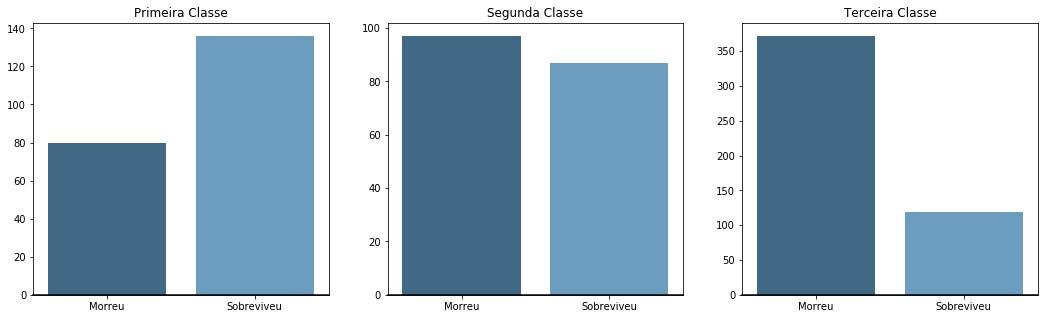

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
x="Survived"

sns.barplot(data = analise, x=x, y="Pclass_1",palette = 'Blues_d', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title("Primeira Classe")
ax1.set_ylabel("")
ax1.set_xlabel("")

sns.barplot(data = analise, x=x, y="Pclass_2",palette = 'Blues_d', ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_title("Segunda Classe")
ax2.set_ylabel("")
ax2.set_xlabel("")

sns.barplot(data = analise, x=x, y="Pclass_3",palette = 'Blues_d', ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_title("Terceira Classe")
ax3.set_ylabel("")
ax3.set_xlabel("")
plt.show()

Gráficos por gênero:

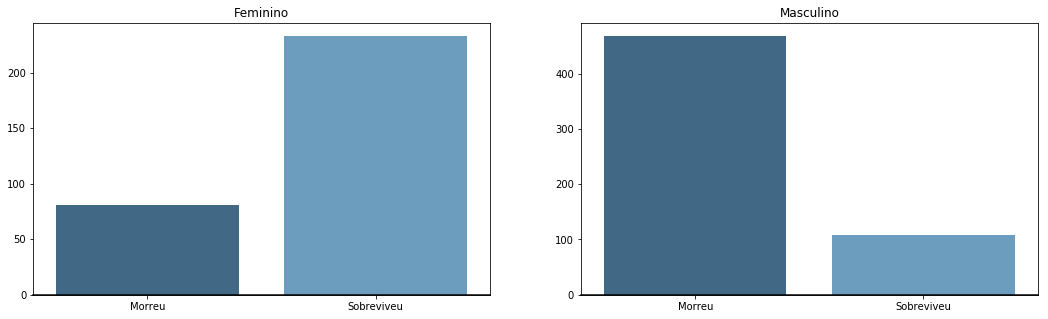

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5), sharex=True)
x="Survived"

sns.barplot(data = analise, x=x, y="Sex_female",palette = 'Blues_d', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title("Feminino")
ax1.set_ylabel("")
ax1.set_xlabel("")

sns.barplot(data = analise, x=x, y="Sex_male",palette = 'Blues_d', ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_title("Masculino")
ax2.set_ylabel("")
ax2.set_xlabel("")
plt.show()

Gráficos por local de embarque:

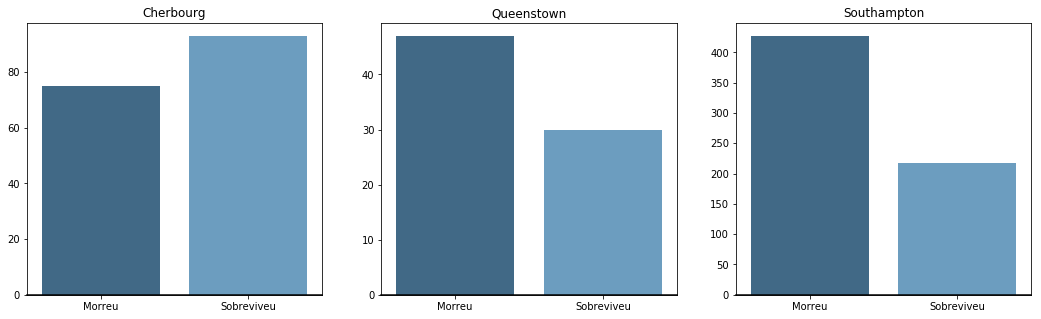

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
x="Survived"

sns.barplot(data = analise, x=x, y="Embarked_C",palette = 'Blues_d', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title("Cherbourg")
ax1.set_ylabel("")
ax1.set_xlabel("")

sns.barplot(data = analise, x=x, y="Embarked_Q",palette = 'Blues_d', ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_title("Queenstown")
ax2.set_ylabel("")
ax2.set_xlabel("")

sns.barplot(data = analise, x=x, y="Embarked_S",palette = 'Blues_d', ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_title("Southampton")
ax3.set_ylabel("")
ax3.set_xlabel("")
plt.show()

Gráficos por faixa etária:

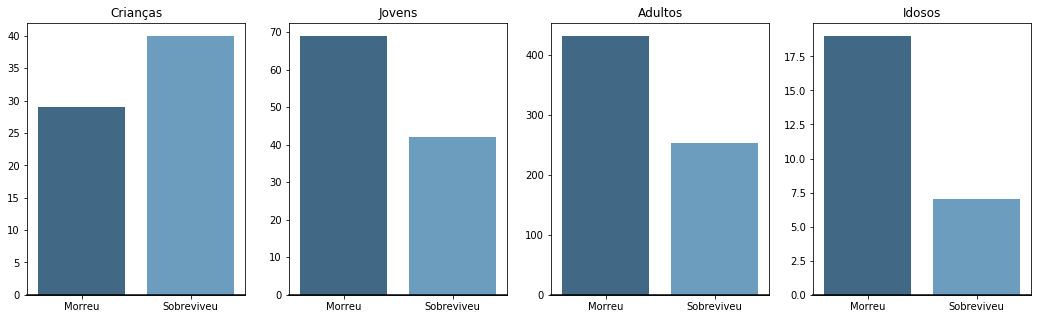

In [33]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 5), sharex=True)
x="Survived"

sns.barplot(data = analise, x=x, y="faixa_etaria_criança",palette = 'Blues_d', ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title("Crianças")
ax1.set_ylabel("")
ax1.set_xlabel("")

sns.barplot(data = analise, x=x, y="faixa_etaria_jovem",palette = 'Blues_d', ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_title("Jovens")
ax2.set_ylabel("")
ax2.set_xlabel("")

sns.barplot(data = analise, x=x, y="faixa_etaria_adulto",palette = 'Blues_d', ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_title("Adultos")
ax3.set_ylabel("")
ax3.set_xlabel("")

sns.barplot(data = analise, x=x, y="faixa_etaria_idoso",palette = 'Blues_d', ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_title("Idosos")
ax4.set_ylabel("")
ax4.set_xlabel("")
plt.show()

###Correlação de variáveis:

Importando bibliotecas necessárias:

In [0]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Visualizando as correlações:

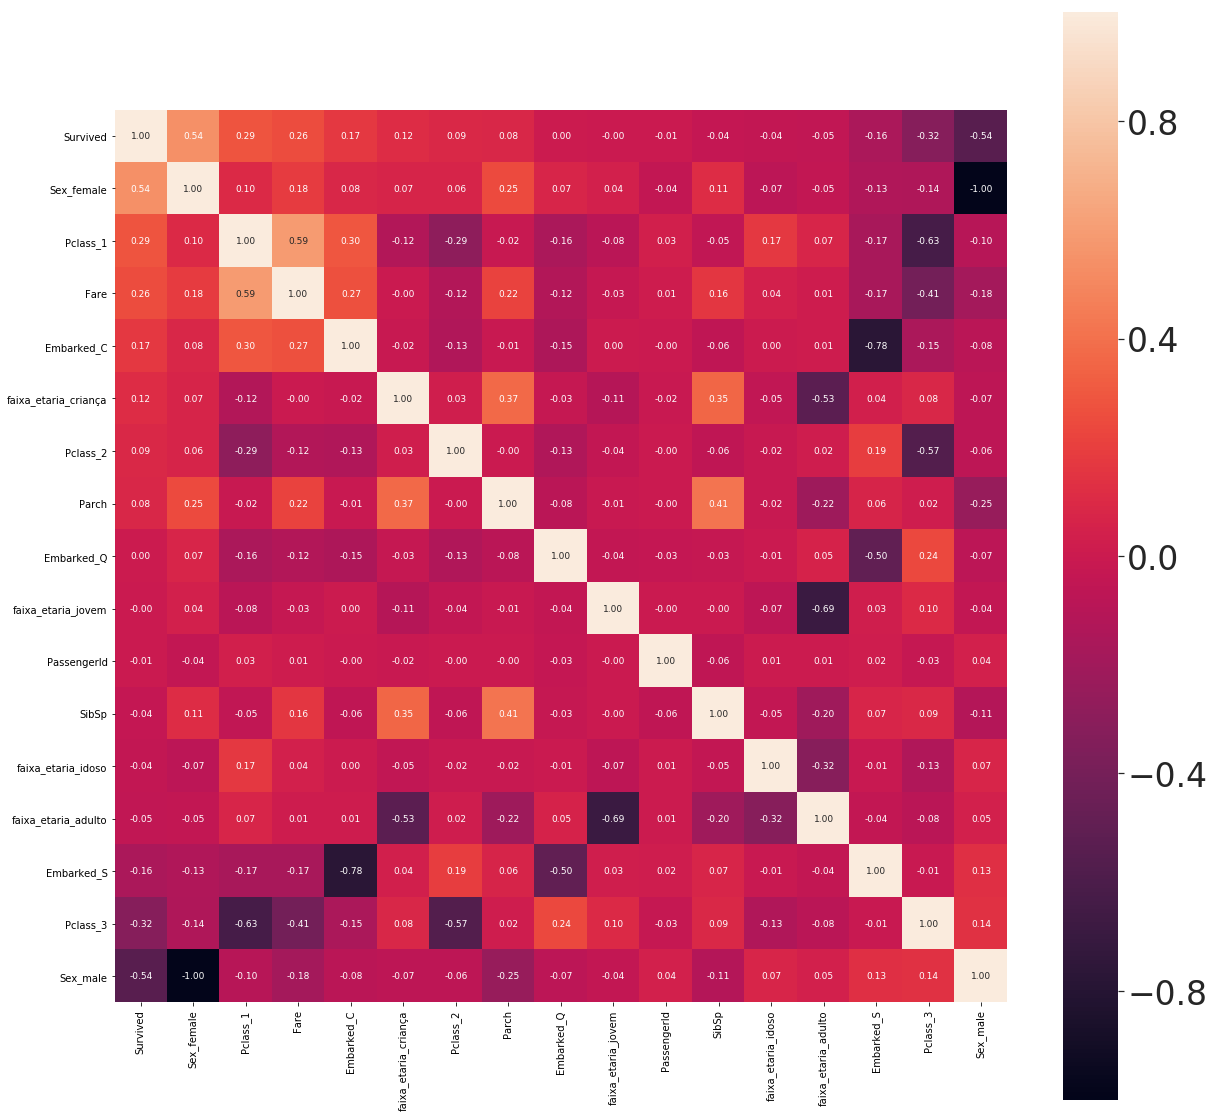

In [35]:
k = 17
f, ax = plt.subplots(figsize=(20, 20))
corrmat = Treino_t4.corr()
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(Treino_t4[cols].values.T)
sns.set(font_scale = 3)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 9}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

***

##Modelo Preditivo

### Árvore de decisão (Decision Tree):

Importando a biblioteca:

In [0]:
from sklearn.tree import DecisionTreeClassifier

Separando as variáveis preditora(X) e alvo(Y):

In [0]:
X = Treino_t4.drop('Survived', axis=1)
Y = Treino_t4['Survived']

Construção do modelo:

In [38]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Avaliando a acurácia do modelo:

In [39]:
tree.score(X,Y)

0.8316498316498316

###Aplicando o modelo no dataset de teste:

O desafio pede que seja gerado um arquivo .csv com duas colunas: a  "PassengerID" extraída do dataset de teste e a "Survived", essa última com a nossa predição.

In [0]:
Resultado_tree = pd.DataFrame()
Resultado_tree['PassengerId'] = Teste_t4['PassengerId']
Resultado_tree['Survived'] = tree.predict(Teste_t4)

Conferindo o DataFrame criado:

In [41]:
Resultado_tree.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Exportando o resultado para o arquivo .csv

In [0]:
Resultado_tree.to_csv('Resultado_tree.csv', index=False)

O arquivo está .csv está disponível em:
<br/>
https://diegoabreu.com/Uploads/Datasets/Kg-Titanic/Resultado_tree.csv

***

##Considerações finais

Com esse modelo conseguimos uma nota de 0.79904 no desafio do Kaggle, ou seja, tivemos 79,90% de acerto. <br/>
Esse é um valor muito bom. Tendo em vista que sobreviver ou não a um acidente é um fato bem complexo. Mesmo que um individuo tenha características que favoreçam a sobrevivência, isso não significa que ele vá efetivamente sobreviver. Isso depende também de outros fatores que não temos acesso como onde ele estava no momento, estado de saúde, preparo físico e etc...<br/>
Acertar praticamente 8 em cada 10 é uma taxa bem legal para o problema proposto. <br/>
Ainda assim, acredito que essa taxa pode ser melhorada, talvez trabalhando de forma diferente as variáveis ou usando um outro modelo de predição. Enfim, estou aberto a sugestões e caso descubra algo novo, atualizarei esse código.

***